# OASIS INFOBYTE DATA SCIENCE INTERNSHIP

# Task 1 : IRIS FLOWER CLASSIFICATION

# Author : SIVA V M 

In [1]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

# load the dataset

In [2]:
df=pd.read_csv("E:\iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
print(df.shape)
print(df.head(5))                 #To display first five records in the dataset

(150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
 print(df.tail(5))               #To display last five records in the dataset

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# TO IDENTIFY MISSING VALUES

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()

0

checking the datatype of variable

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


In [11]:
#sample of each class
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
df.drop("Id",axis=1,inplace=True)

In [13]:
df.corr().T.style.background_gradient()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# data visualization

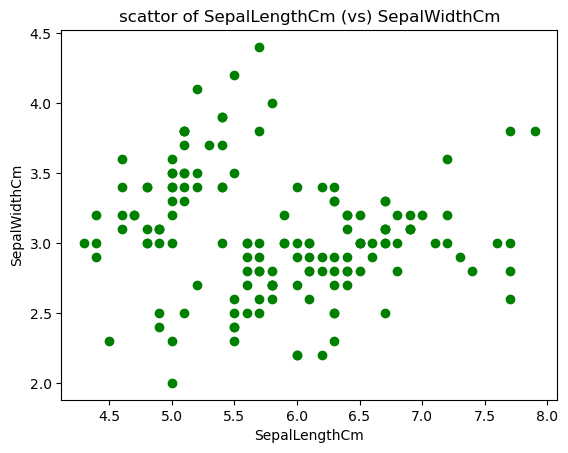

In [14]:
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"],color="green")
plt.title("scattor of SepalLengthCm (vs) SepalWidthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()

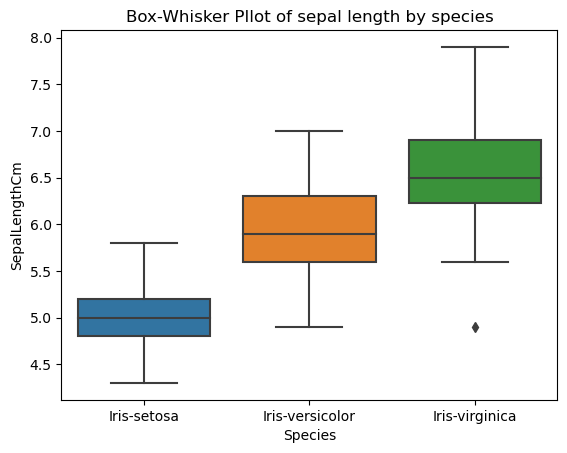

In [15]:
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.xlabel("Species")
plt.ylabel("SepalLengthCm")
plt.title("Box-Whisker Pllot of sepal length by species")
plt.show()

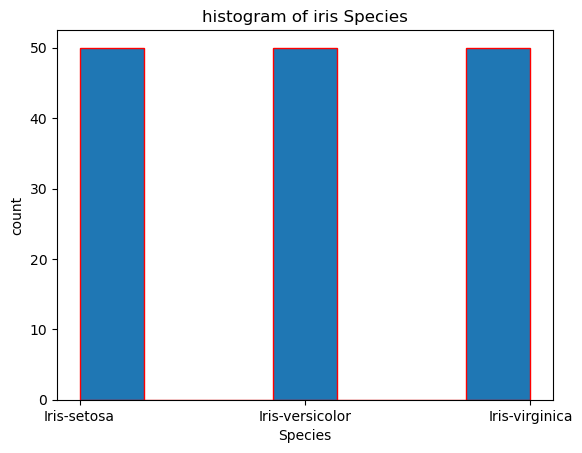

In [16]:
#create a histogram plot
plt.hist(df["Species"],bins=7,edgecolor="red")
plt.xlabel("Species")
plt.ylabel("count")
plt.title("histogram of iris Species")
plt.show()

In [17]:
X=df.iloc[:,:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y=df.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

SPLITTING THE DATA INTO TRAINING AND TESTING SET USING TRAIN_TEST_SPLIT

LET'S ASSUME WE DECIDED TO SPLIT THE DATASET INTO 80% TRAIN DATA AND 20% TEST DATA.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [21]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3
...,...,...,...,...
26,5.0,3.4,1.6,0.4
89,5.5,2.5,4.0,1.3
65,6.7,3.1,4.4,1.4
80,5.5,2.4,3.8,1.1


In [22]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
119,6.0,2.2,5.0,1.5
128,6.4,2.8,5.6,2.1
135,7.7,3.0,6.1,2.3
91,6.1,3.0,4.6,1.4
112,6.8,3.0,5.5,2.1
71,6.1,2.8,4.0,1.3
123,6.3,2.7,4.9,1.8
85,6.0,3.4,4.5,1.6
147,6.5,3.0,5.2,2.0
143,6.8,3.2,5.9,2.3


In [23]:
y_train

79     Iris-versicolor
54     Iris-versicolor
106     Iris-virginica
90     Iris-versicolor
145     Iris-virginica
            ...       
26         Iris-setosa
89     Iris-versicolor
65     Iris-versicolor
80     Iris-versicolor
140     Iris-virginica
Name: Species, Length: 120, dtype: object

In [24]:
y_test

119     Iris-virginica
128     Iris-virginica
135     Iris-virginica
91     Iris-versicolor
112     Iris-virginica
71     Iris-versicolor
123     Iris-virginica
85     Iris-versicolor
147     Iris-virginica
143     Iris-virginica
127     Iris-virginica
39         Iris-setosa
38         Iris-setosa
93     Iris-versicolor
23         Iris-setosa
133     Iris-virginica
30         Iris-setosa
83     Iris-versicolor
37         Iris-setosa
41         Iris-setosa
81     Iris-versicolor
120     Iris-virginica
43         Iris-setosa
2          Iris-setosa
64     Iris-versicolor
62     Iris-versicolor
56     Iris-versicolor
67     Iris-versicolor
49         Iris-setosa
63     Iris-versicolor
Name: Species, dtype: object

In [25]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\SivaVM\Desktop\local folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.predict(X_test)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [27]:
model.score(X_test,y_test)

0.9333333333333333

In [28]:
y_predicted=model.predict(X_test)
y_predicted

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

To measure the performance of the classification model we use the confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth or Actual Value')

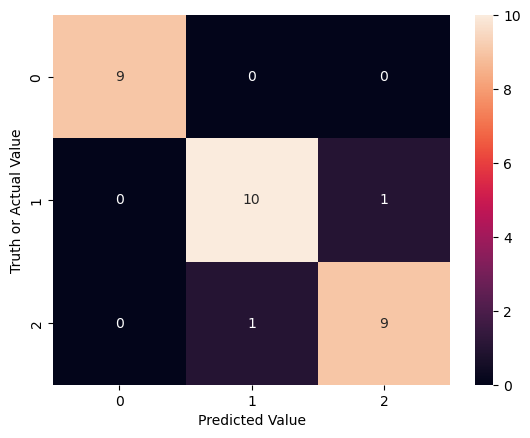

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')